<a href="https://colab.research.google.com/github/IGPTsewwandi/Image-Processing-Based-Smart-Waste-Management-System-/blob/feature%2Fclassification/Live_Capture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ------------------------------
# STEP 0: Imports
# ------------------------------
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import load_model


In [2]:
# ------------------------------
# STEP 1: Load Trained Model
# ------------------------------
model_path = "/content/drive/MyDrive/waste_outputs/waste_classifier_model.h5"
model = load_model(model_path)

class_labels = ['plastic', 'glass', 'paper', 'metal', 'organic']


Saved to photo.jpg


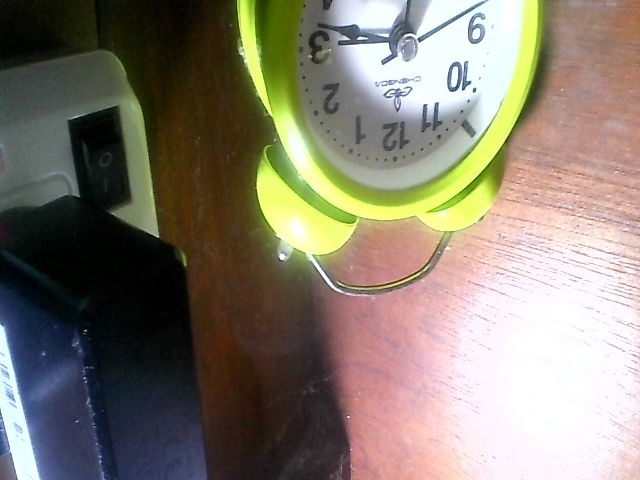

In [7]:
# ------------------------------
# STEP 2: Capture Photo from Webcam
# ------------------------------
from google.colab.output import eval_js
from base64 import b64decode
import cv2
from google.colab.patches import cv2_imshow

def take_photo(filename='photo.jpg', quality=0.8):
    js_code = """
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();

      return canvas.toDataURL('image/jpeg', quality);
    }
    takePhoto(%f);
    """ % quality

    data = eval_js(js_code)
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Capture photo
filename = take_photo()
print("Saved to", filename)

# Display photo
img = cv2.imread(filename)
cv2_imshow(img)


In [8]:
# ------------------------------
# STEP 3: Load and Preprocess Image
# ------------------------------
img = cv2.imread(filename)
img_resized = cv2.resize(img, (128,128))           # same size as training
img_array = img_resized.astype("float32") / 255.0  # normalize
img_array = np.expand_dims(img_array, axis=0)      # add batch dimension


In [9]:
# ------------------------------
# STEP 4: Make Prediction
# ------------------------------
pred = model.predict(img_array)
class_id = np.argmax(pred)
label = class_labels[class_id]
confidence = np.max(pred) * 100
print(f"Detected: {label} ({confidence:.2f}%)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step
Detected: metal (20.30%)


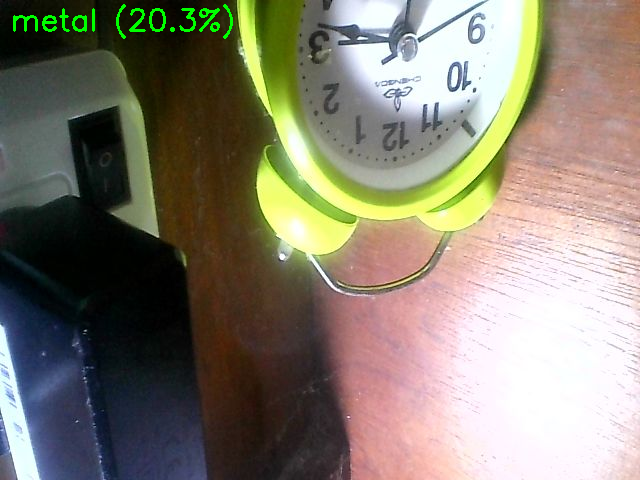

In [10]:
# ------------------------------
# STEP 5: Display Image with Prediction
# ------------------------------
cv2.putText(img, f"{label} ({confidence:.1f}%)", (10,30),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
cv2_imshow(img)
